# **Fourier Transform in Numpy**

(Text(0.5, 1.0, 'Magnitude Spectrum'), ([], []), ([], []))

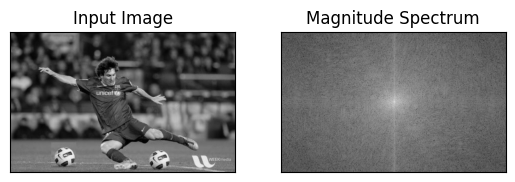

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/messii5.jpeg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

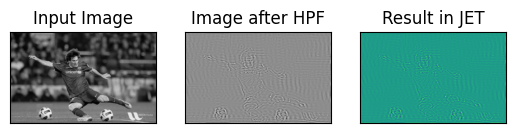

In [ ]:
rows, cols = img.shape
crow, ccol = rows//2, cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

# **Fourier Transform in OpenCV**

(Text(0.5, 1.0, 'Magnitude Spectrum'), ([], []), ([], []))

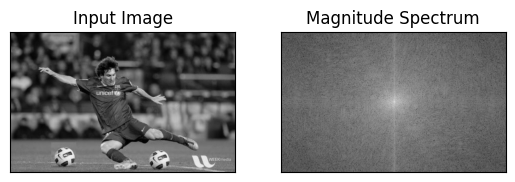

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/content/messii5.jpeg', cv.IMREAD_GRAYSCALE)
#assert img is not None, "file could not be read, check with os.path.exists()"

dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Magnitude Spectrum'), ([], []), ([], []))

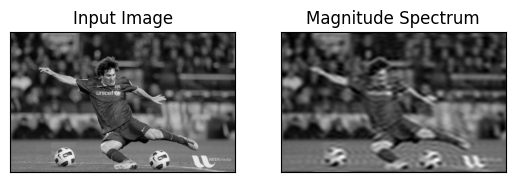

In [ ]:
rows, cols = img.shape
crow, ccol = rows//2, cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

# **Performance Optimization of DFT**

In [ ]:
img = cv.imread('/content/messii5.jpeg', cv.IMREAD_GRAYSCALE)
rows,cols = img.shape
print("{} {}".format(rows,cols))

280 450


In [ ]:
nrows = cv.getOptimalDFTSize(rows)
ncols = cv.getOptimalDFTSize(cols)
print("{} {}".format(nrows,ncols))

288 450


In [ ]:
nimg = np.zeros((nrows,ncols))
nimg[:rows,:cols] = img

In [ ]:
right = ncols - cols
bottom = nrows - rows
bordertype = cv.BORDER_CONSTANT #just to avoid line breakup in PDF file
nimg = cv.copyMakeBorder(img,0,bottom,0,right,bordertype, value = 0)

In [ ]:
%timeit fft1 = np.fft.fft2(img)

4.9 ms ± 2.9 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit fft2 = np.fft.fft2(img,[nrows,ncols])

5.8 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit dft1= cv.dft(np.float32(img),flags=cv.DFT_COMPLEX_OUTPUT)

777 µs ± 163 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit dft2= cv.dft(np.float32(nimg),flags=cv.DFT_COMPLEX_OUTPUT)

1.22 ms ± 377 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# **Why Laplacian is a High Pass Filter?**


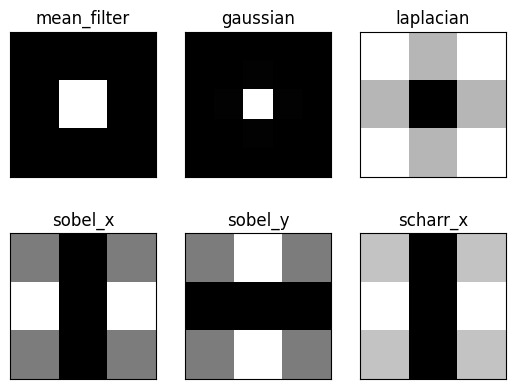

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a gaussian filter
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
 [-10,0,10],
 [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
 [-2, 0, 2],
 [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
 [0, 0, 0],
 [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
 [1,-4, 1],
 [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
 'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
 plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()